### Student Information
Name:唐孟婕

Student ID:112062539

GitHub ID:jessie1130

Kaggle name:Jessie

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect_train = CountVectorizer()
count_vect_test = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
test_counts = count_vect_test.fit_transform(test_df.text)

#use sparse matrix to find the count of every term in every documents
from collections import Counter 
from scipy.sparse import csr_matrix, find

train_matrix = csr_matrix(train_counts.toarray())
train = find(train_matrix)
train_term = list(train[1])
test_matrix = csr_matrix(test_counts.toarray())
test = find(test_matrix)
test_term = list(test[1])

#use counter to find the 30 terms appear
train_counters = Counter(train_term)
train_most = train_counters.most_common(30)
test_counters = Counter(test_term)
test_most = test_counters.most_common(30)

# the 30 most terms
plot_train = []
for i in train_most:
    plot_train.append(count_vect_train.get_feature_names_out()[i[0]])
print(plot_train)
plot_test = []
for i in test_most:
    plot_test.append(count_vect_test.get_feature_names_out()[i[0]])
print(plot_test)

['the', 'to', 'and', 'is', 'of', 'it', 'you', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'just', 'but', 'not', 'with', 'can', 'at', 'like', 'all', 'when', 'are', 'if', 'your', 'was']
['the', 'to', 'and', 'is', 'of', 'it', 'in', 'you', 'that', 'for', 'my', 'on', 'be', 'me', 'so', 'can', 'just', 'at', 'have', 'all', 'was', 'are', 'but', 'with', 'your', 'not', 'up', 'this', 'get', 'like']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
#TF-IDF
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (TF-IDF)
TF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
TF_vectorizer.fit(train_df['text'])

TF_features = TF_vectorizer.transform(train_df['text'])

## check dimension
TF_features.shape

feature_names_500_TF = TF_vectorizer.get_feature_names_out()
feature_names_500_TF[100:110]

[nltk_data] Downloading package punkt to /home/jessie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

'joy' is very differeny from 3 other emotions, so it has higher accuracy. 'anger', 'fear' and 'sadness' are all negative emotions, some cases would be classified wrong.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
# build analyzers (TF-IDF)
TF_vectorizer = TfidfVectorizer(max_features=1000)

# apply analyzer to training data
TF_vectorizer.fit(train_df['text'])

#split dataset into train and test
X_train = TF_vectorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TF_vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

#build model and train
from sklearn.naive_bayes import MultinomialNB # classifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score  # evaluation

model_NB = MultinomialNB()

model_NB.fit(X_train, y_train)

#predict
y_pred_tfidf = model_NB.predict(X_test)

#caculate accuracy
f1 = f1_score(y_test, y_pred_tfidf, average='weighted')
accuracy = accuracy_score(y_test, y_pred_tfidf)
print('Multinomial Naive Bayes with TF-IDF:')
print('-' * 40)
print(f'f1: {f1:.4f}')
print(f'accuracy: {accuracy:.4f}')

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm_NB = confusion_matrix(y_true=y_test, y_pred=y_pred_tfidf) 
print(cm_NB)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)
Multinomial Naive Bayes with TF-IDF:
----------------------------------------
f1: 0.7654
accuracy: 0.7666
[[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Navie Bayes has better accuracy than Decision Tree. In my opinion, Decision Tree classifies the sentences step by step according to words, however, it can't tell the importance of words. For example, if a sentence uses double negative way, it may classify wrong. Naive Bayes uses condition probability, so it can calculate the relation between words compare to Decision Tree.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below. How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/Accuracy.png" style="width: 300px;"/> </td>
    <td><img src="pics/Loss.png" style="width: 300px;"/> </td>
</tr></table>

As long as the epoch increaes, the train accuracy also increase, however, the val accuracy doesn't increase. I think it's because overfitting. Train accuracy stays high, but val accuracy can't get higher.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
#average of words vectors
em = [] 
for doc in training_corpus:
    total = word2vec_model.wv[doc][0]
    for i in range(1,len(doc)):
        total += word2vec_model.wv[doc][i] 
    em.append(total/len(doc)) 
    
print(em)

[array([-0.51458365,  0.47274482, -0.07424285,  0.16068952, -0.1574393 ,
       -0.73573947,  0.553628  ,  1.3402225 , -0.7618062 , -0.403679  ,
       -0.09095346, -0.8417401 ,  0.06591991,  0.56888396,  0.11641002,
       -0.142946  ,  0.64242464, -0.15948921, -0.41423747, -1.4399942 ,
        0.55675054,  0.47590542,  0.6085972 , -0.23730579,  0.07216912,
        0.05843095, -0.7396793 , -0.21134649, -0.3340599 , -0.14473778,
        0.43508175,  0.14264058,  0.7343863 , -0.6444565 , -0.35587135,
        0.6227841 ,  0.27254903, -0.36171478, -0.23716405, -0.8196129 ,
        0.16355397, -0.30191696, -0.3372773 ,  0.07602315,  0.44380596,
       -0.02823536, -0.2862775 , -0.09054361,  0.3897215 ,  0.47269934,
        0.10141348, -0.17414881, -0.44626027, -0.24396011, -0.14464998,
        0.10768391,  0.03680624, -0.33983785, -0.1340509 ,  0.15504748,
        0.15080094,  0.00639168,  0.46907276,  0.05388248, -0.33535668,
        0.8514019 ,  0.18486741,  0.3682986 , -0.8251183 ,  0.5

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

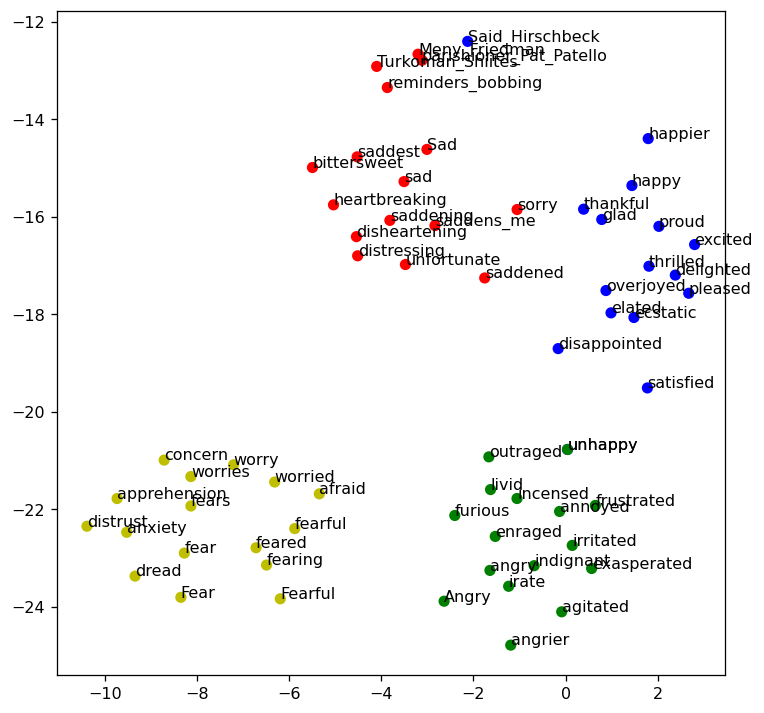

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()